<a href="https://colab.research.google.com/github/kajanthyS/478Project/blob/main/image_denoising_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import cv2
import os
from skimage import measure

In [ ]:
I = cv2.imread('/lenacolor256.png',0) 

In [ ]:
# Add gaussian noise
noisy = random_noise(I, mode='gaussian',var=0.01) 

In [ ]:
# Calculating performance measures 

#Mean square error (MSE)
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

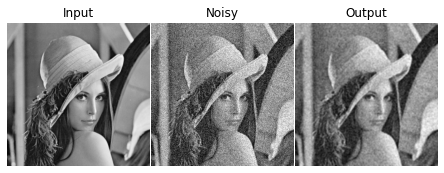

17443.977567445156

In [ ]:
# Apply the mean filter 
output = cv2.boxFilter(noisy,-1,(3,3))
# or use cv2.blur() as shown below
# output = cv2.blur(noisy,(3,3))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
mse(I,output)

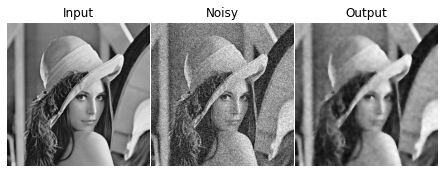

130.8346710205078

In [ ]:
# Apply the bilateral filter 
#Input: 8-bit or floating-point, 1-channel or 3-channel image.
noisy8 = np.asarray(255*noisy, dtype = 'uint8')
output = cv2.bilateralFilter(noisy8,9,75,75)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
mse(I,output)

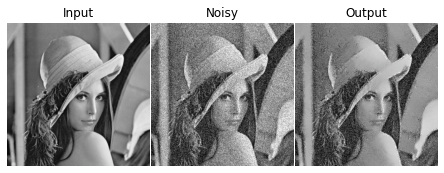

In [ ]:
# Apply the nonlocal means filter 
noisy_img=cv2.cvtColor(noisy8, cv2.COLOR_GRAY2BGR)
output = cv2.fastNlMeansDenoisingColored(noisy_img,None,10,10,7,21)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()

In [ ]:
#Add salt and pepper noise 
noisy = random_noise(I, mode='s&p',amount=0.05)
# The above function returns a floating-point image on the range [0, 1],
# thus we changed it to 'uint8' and from [0,255]
noisy = np.array(255*noisy, dtype = 'uint8')

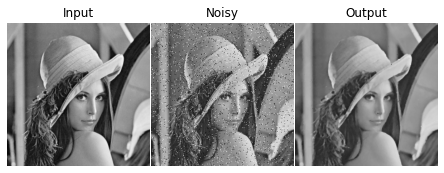

45.02345275878906

In [ ]:
# Apply median filter 
output = cv2.medianBlur(noisy,3)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
mse(I,output)